In [1]:
#!unzip "/content/test_dataset_test.zip"

In [2]:
#!unzip "/content/train_dataset_train.zip"

In [22]:
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = "0"

from pathlib import Path
import shutil

import torch
import torch.nn as nn
import torch.functional as f
from glob import glob

from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
def give_sings(number):
    sings = ['3.24', '1.16', '5.15.5', '5.19.1', '5.19.2', '1.20.1', '8.23',
'2.1', '4.2.1', '8.22.1', '6.16', '1.22', '1.2', '5.16', '3.27',
'6.10.1', '8.2.4', '6.12', '5.15.2', '3.13', '3.1', '3.20', '3.12',
'7.14.2', '5.23.1', '2.4', '5.6', '4.2.3', '8.22.3', '5.15.1',
'7.3', '3', '2.3.1', '3.11', '6.13', '5.15.4', '8.2.1', '1.34.3',
'8.2.2', '5.15.3', '1.17', '4.1.1', '4.1.4', '3.25', '1.20.2',
'8.22.2', '6.9.2', '3.2', '5.5', '5.15.7', '7.12', '8.2.3',
'5.24.1', '1.25', '3.28', '5.9.1', '5.15.6', '8.1.1', '1.10',
'6.11', '3.4', '6.10', '6.9.1', '8.2.5', '5.15', '4.8.2', '8.22',
'5.21', '5.18']
    print("Номеру", number, "соотвесвутет", sings[number-1], "знак")

In [4]:
def give_number(sign):
    sings = ['3.24', '1.16', '5.15.5', '5.19.1', '5.19.2', '1.20.1', '8.23',
'2.1', '4.2.1', '8.22.1', '6.16', '1.22', '1.2', '5.16', '3.27',
'6.10.1', '8.2.4', '6.12', '5.15.2', '3.13', '3.1', '3.20', '3.12',
'7.14.2', '5.23.1', '2.4', '5.6', '4.2.3', '8.22.3', '5.15.1',
'7.3', '3', '2.3.1', '3.11', '6.13', '5.15.4', '8.2.1', '1.34.3',
'8.2.2', '5.15.3', '1.17', '4.1.1', '4.1.4', '3.25', '1.20.2',
'8.22.2', '6.9.2', '3.2', '5.5', '5.15.7', '7.12', '8.2.3',
'5.24.1', '1.25', '3.28', '5.9.1', '5.15.6', '8.1.1', '1.10',
'6.11', '3.4', '6.10', '6.9.1', '8.2.5', '5.15', '4.8.2', '8.22',
'5.21', '5.18']
    for i in range(len(sings)):
        if sings[i] == sign:
            print("Знаку", sign, "соотвествует", i + 1, "номер")

In [5]:
give_sings(1)

Номеру 1 соотвесвутет 3.24 знак


In [6]:
give_number("1.19")

In [7]:
train_folders = sorted(glob('data/trainset/train/*'))
len(train_folders)

778

In [8]:
train_df = pd.read_csv("data/trainset/train.csv")

In [9]:
test_df = pd.read_csv("data/testset/test.csv")

In [10]:
test_df

,id,img
0,754,6-avi-frame14887_jpg.rf.bb0bf6b4b122c23e1b33a9...
1,29,5-avi-frame2916_jpg.rf.1ecdbbc129d33896fd25b9b...
2,1157,5-avi-frame2871_jpg.rf.f73998176f8a19ee03f8704...
3,1049,6-avi-frame5752_jpg.rf.a067b0fc55b770c9b10bb7a...
4,715,6-avi-frame5678_jpg.rf.f140419d224703d49fe65db...
...,...,...
383,243,3-avi-frame433_jpg.rf.b29d8fb61048b3016805a62e...
384,921,6-avi-frame4125_jpg.rf.e1dbdc7a7421bc9bc95a58f...
385,881,6-avi-frame1424_jpg.rf.e171549738da66b200b537c...
386,503,5-avi-frame2867_jpg.rf.c0bbb8942eeb6fac582e6b6...


In [11]:
class_index = ['sing1', 'sing2', 'sing3', 'sing4', 'sing5', 'sing6', 'sing7', 'sing8']

simple_array = []
chunked_list= list()
chunk_size = 8


for i in range(777):
    for k in class_index:
        simple_array.append(train_df[k][i])
        
for i in range(0, len(simple_array), chunk_size):
    chunked_list.append(simple_array[i:i+chunk_size])



In [12]:
final_list = []

In [13]:
for i in chunked_list:
    i = [k for k in i if k != 0] 
    final_list.append(i)

In [14]:
final_list

[[1, 2, 37],
 [8],
 [21],
 [5, 4],
 [48],
 [4, 5, 14],
 [2, 1, 37],
 [1, 2],
 [32, 4, 5],
 [13],
 [1, 7],
 [8],
 [25],
 [32, 57, 5, 4],
 [15],
 [26],
 [1, 7],
 [8],
 [6],
 [15, 35, 17],
 [8],
 [8],
 [12, 1],
 [15, 35, 17],
 [51],
 [6],
 [8],
 [8, 49, 18],
 [42, 16, 21],
 [15],
 [8, 35],
 [15],
 [1, 15, 2],
 [8, 14],
 [6, 10],
 [4, 15],
 [8, 16],
 [1, 45, 4, 5, 46],
 [8],
 [15, 17],
 [1, 7, 10],
 [2, 1, 37],
 [20, 4, 5],
 [9, 47, 10],
 [1, 2, 37],
 [8, 4, 5],
 [26],
 [6, 55],
 [9, 10, 4, 14],
 [1],
 [8, 51, 38],
 [36],
 [5, 4],
 [8, 4, 5],
 [15, 10],
 [8, 4, 5],
 [5, 4, 20],
 [48],
 [1, 10],
 [4, 5],
 [8, 4],
 [28, 29],
 [8],
 [15],
 [8, 5, 4],
 [8, 35],
 [8, 35],
 [8, 14],
 [8, 4, 5, 16],
 [8],
 [1, 2, 37],
 [28, 29, 30],
 [9, 10],
 [42, 16, 21],
 [8],
 [2],
 [28, 29],
 [9, 10, 11, 4, 5, 14],
 [8, 16, 54],
 [1, 2, 37],
 [4, 5],
 [28, 29],
 [9, 4, 5, 10, 14],
 [8, 14],
 [42],
 [8, 51, 38],
 [6],
 [1, 7],
 [30, 40],
 [4, 5],
 [8, 10, 19, 11],
 [16, 10],
 [5, 4],
 [1, 2],
 [61],
 [8, 4, 5

In [15]:
train_df.head(40)

,id,img,sing1,sing2,sing3,sing4,sing5,sing6,sing7,sing8
0,807,5-avi-frame24_jpg.rf.5dec372f9195e9a88ff7dd3bd...,1,2,37,0,0,0,0,0
1,121,6-avi-frame6431_jpg.rf.1ad48ac0ce545b88cefb946...,8,0,0,0,0,0,0,0
2,1130,9-avi-frame1457_jpg.rf.634a979898a9caa4d106913...,21,0,0,0,0,0,0,0
3,378,3-avi-frame499_jpg.rf.a0464ac21591528194da5bcf...,5,4,0,0,0,0,0,0
4,1079,5-avi-frame5306_jpg.rf.8cd8b5643eea33f5f33714e...,48,0,0,0,0,0,0,0
5,860,6-avi-frame3779_jpg.rf.14ff604c1af34671e5748ab...,4,5,14,0,0,0,0,0
6,769,5-avi-frame16_jpg.rf.77026200267155755337fb456...,2,1,37,0,0,0,0,0
7,298,5-avi-frame1531_jpg.rf.54c3c024dcf98b542ba9446...,1,2,0,0,0,0,0,0
8,500,5-avi-frame3315_jpg.rf.78b197fe5bd8242fbe4c761...,32,4,5,0,0,0,0,0
9,450,5-avi-frame3463_jpg.rf.a37b3477e30833ce9b5c749...,13,0,0,0,0,0,0,0


In [17]:
train_df, valid_df = train_test_split(train_df, test_size=0.3, random_state=43)

In [18]:
train_df.shape, valid_df.shape

((544, 10), (234, 10))

Для фокусировки на знаках используем YOLOv5.

Был подготвлен датасет с binding box. Переведем их в формат YOLO annotation формат.

In [ ]:
!python yolov5/train.py --img 608 --batch 32 --epochs 50 --data data/YOLO_data/data.yaml --weights yolov5s.pt --cache

In [37]:
!python yolov5/detect.py --weights best_300.pt --img 416 --conf 0.4 --source data/trainset/train --save-crop

detect: weights=['best_300.pt'], source=data/trainset/train, data=yolov5\data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-182-g1158a50 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7254609 parameters, 0 gradients
image 1/778 E:\AutoPilotChampionship\data\trainset\train\3-avi-frame417_jpg.rf.2e4440e1272a5ac19f1488623f459e68.jpg: 288x416 (no detections), 80.0ms
image 2/778 E:\AutoPilotChampionship\data\trainset\train\3-avi-frame418_jpg.rf.c31c6b58ea806f930a1854f3fcc224c5.jpg: 288x416 (no detections), 62.0ms
image 3/778 E:\AutoPilotChampionship\data\trainset\train\3-avi-frame420_jpg.rf.0a1295890e0

Классификатор для знаков.

In [32]:
# For the model and it's training
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

In [4]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [112]:
train_path = 'data/trainset/train/'
test_path = 'data/testest/test/'


In [114]:
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [11]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(78418, 30, 30, 3) (78418,)


In [12]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [13]:
print(image_data.shape, image_labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(78418, 30, 30, 3) (78418,)
(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


In [111]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [43]:
with tf.device('/GPU:0'):
    epochs = 15
    history1 = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
1961/1961 [==============================] - 20s 8ms/step - loss: 1.1590 - accuracy: 0.6965 - val_loss: 0.1275 - val_accuracy: 0.9675
Epoch 2/15
1961/1961 [==============================] - 14s 7ms/step - loss: 0.2834 - accuracy: 0.9190 - val_loss: 0.0807 - val_accuracy: 0.9793
Epoch 3/15
1961/1961 [==============================] - 14s 7ms/step - loss: 0.2184 - accuracy: 0.9388 - val_loss: 0.0480 - val_accuracy: 0.9863
Epoch 4/15
1961/1961 [==============================] - 14s 7ms/step - loss: 0.2167 - accuracy: 0.9435 - val_loss: 0.0707 - val_accuracy: 0.9802
Epoch 5/15
1961/1961 [==============================] - 14s 7ms/step - loss: 0.1996 - accuracy: 0.9490 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 6/15
1961/1961 [==============================] - 14s 7ms/step - loss: 0.1962 - accuracy: 0.9496 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoch 7/15
1961/1961 [==============================] - 14s 7ms/step - loss: 0.2115 - accuracy: 0.9504 - val_loss: 0.0539 - val_ac

NameError: name 'date_time' is not defined

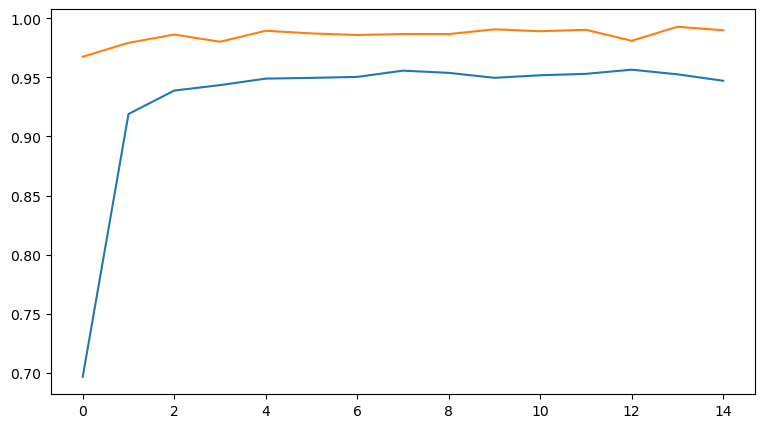

In [44]:
plot_performance(history=history1)

In [50]:
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('data_classif/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('data_classif/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 1s 2ms/step
0.915439429928741


In [51]:
model.save('traffic_classifier.h5')

In [16]:
from keras.models import load_model

In [17]:
model = load_model('traffic_classifier.h5')

In [84]:
from enum import unique
from os import listdir
from os.path import isfile, join

onlyfiles = []
unique_files = []
for i in range(0, 4):
    onlyfiles.append([f for f in listdir("E:/AutoPilotChampionship/yolov5/runs/detect/exp16/crops/" + str(i) + "/") if isfile(join("E:/AutoPilotChampionship/yolov5/runs/detect/exp16/crops/" + str(i) + "/", f))])

In [85]:
for i in range(0, 4):
    for f in listdir("E:/AutoPilotChampionship/yolov5/runs/detect/exp16/crops/" + str(i) + "/"):
        if isfile(join("E:/AutoPilotChampionship/yolov5/runs/detect/exp16/crops/" + str(i) + "/", f)):
            f = f.split(".rf.")[0]
            unique_files.append(f)

In [86]:
unique_files

['5-avi-frame2815_jpg',
 '5-avi-frame2815_jpg',
 '5-avi-frame2819_jpg',
 '5-avi-frame345_jpg',
 '5-avi-frame3464_jpg',
 '5-avi-frame349_jpg',
 '5-avi-frame350_jpg',
 '5-avi-frame4093_jpg',
 '5-avi-frame4098_jpg',
 '5-avi-frame4434_jpg',
 '5-avi-frame4567_jpg',
 '5-avi-frame4911_jpg',
 '5-avi-frame5123_jpg',
 '5-avi-frame5268_jpg',
 '5-avi-frame5268_jpg',
 '5-avi-frame5306_jpg',
 '5-avi-frame5401_jpg',
 '5-avi-frame5401_jpg',
 '5-avi-frame5402_jpg',
 '5-avi-frame757_jpg',
 '6-avi-frame12144_jpg',
 '6-avi-frame12348_jpg',
 '6-avi-frame12348_jpg',
 '6-avi-frame12350_jpg',
 '6-avi-frame12351_jpg',
 '6-avi-frame12435_jpg',
 '6-avi-frame13245_jpg',
 '6-avi-frame13245_jpg',
 '6-avi-frame13357_jpg',
 '6-avi-frame13364_jpg',
 '6-avi-frame13366_jpg',
 '6-avi-frame13366_jpg',
 '6-avi-frame13623_jpg',
 '6-avi-frame13625_jpg',
 '6-avi-frame13627_jpg',
 '6-avi-frame14104_jpg',
 '6-avi-frame14104_jpg',
 '6-avi-frame14390_jpg',
 '6-avi-frame14400_jpg',
 '6-avi-frame14568_jpg',
 '6-avi-frame14569_jpg',

In [99]:
test_df = pd.read_csv("E:/AutoPilotChampionship/data/testset/test.csv")
test_df[]

,id,img
0,754,6-avi-frame14887_jpg.rf.bb0bf6b4b122c23e1b33a9...
1,29,5-avi-frame2916_jpg.rf.1ecdbbc129d33896fd25b9b...
2,1157,5-avi-frame2871_jpg.rf.f73998176f8a19ee03f8704...
3,1049,6-avi-frame5752_jpg.rf.a067b0fc55b770c9b10bb7a...
4,715,6-avi-frame5678_jpg.rf.f140419d224703d49fe65db...
...,...,...
383,243,3-avi-frame433_jpg.rf.b29d8fb61048b3016805a62e...
384,921,6-avi-frame4125_jpg.rf.e1dbdc7a7421bc9bc95a58f...
385,881,6-avi-frame1424_jpg.rf.e171549738da66b200b537c...
386,503,5-avi-frame2867_jpg.rf.c0bbb8942eeb6fac582e6b6...


In [107]:
unique_files = set(unique_files)
unique_files = list(unique_files)
unique_files

['6-avi-frame13282_jpg',
 '6-avi-frame14888_jpg',
 '6-avi-frame6714_jpg',
 '5-avi-frame336_jpg',
 '5-avi-frame19_jpg',
 '6-avi-frame12350_jpg',
 '6-avi-frame12149_jpg',
 '5-avi-frame4911_jpg',
 '6-avi-frame13627_jpg',
 '6-avi-frame4379_jpg',
 '5-avi-frame4079_jpg',
 '5-avi-frame243_jpg',
 '6-avi-frame12144_jpg',
 '5-avi-frame5430_jpg',
 '4-avi-frame361_jpg',
 '5-avi-frame4033_jpg',
 '6-avi-frame4199_jpg',
 '5-avi-frame349_jpg',
 '6-avi-frame14889_jpg',
 '5-avi-frame232_jpg',
 '5-avi-frame4577_jpg',
 '6-avi-frame6464_jpg',
 '6-avi-frame4603_jpg',
 '5-avi-frame357_jpg',
 '4-avi-frame356_jpg',
 '5-avi-frame238_jpg',
 '5-avi-frame4085_jpg',
 '5-avi-frame360_jpg',
 '6-avi-frame4463_jpg',
 '3-avi-frame431_jpg',
 '6-avi-frame13625_jpg',
 '5-avi-frame345_jpg',
 '6-avi-frame13366_jpg',
 '3-avi-frame674_jpg',
 '5-avi-frame5432_jpg',
 '6-avi-frame12151_jpg',
 '6-avi-frame6434_jpg',
 '6-avi-frame14400_jpg',
 '5-avi-frame4098_jpg',
 '5-avi-frame4991_jpg',
 '6-avi-frame12348_jpg',
 '5-avi-frame4076_

In [108]:

all_pics = [f for f in test_df['img']]
all_pics

['6-avi-frame14887_jpg.rf.bb0bf6b4b122c23e1b33a9e05d006b06.jpg',
 '5-avi-frame2916_jpg.rf.1ecdbbc129d33896fd25b9b8dfdbfc43.jpg',
 '5-avi-frame2871_jpg.rf.f73998176f8a19ee03f870416674385b.jpg',
 '6-avi-frame5752_jpg.rf.a067b0fc55b770c9b10bb7a822425229.jpg',
 '6-avi-frame5678_jpg.rf.f140419d224703d49fe65db505e7f1ce.jpg',
 '5-avi-frame2656_jpg.rf.74ad968c68c4018408fde487873dcc4e.jpg',
 '6-avi-frame13288_jpg.rf.25eebbce0617c60a8555c4fddf921730.jpg',
 '5-avi-frame355_jpg.rf.4d1a110ace34c0a58c7304439f84e4d5.jpg',
 '5-avi-frame2512_jpg.rf.86ff5fb4533226b55c57ec031eaf59f2.jpg',
 '6-avi-frame5558_jpg.rf.ad41e5b5ca397c2313f4b1adb2c33c67.jpg',
 '3-avi-frame506_jpg.rf.b5c0446b13adc22ec30b713b1c109f1f.jpg',
 '6-avi-frame5918_jpg.rf.d6fb5cca661040286b268e7fff66afbb.jpg',
 '6-avi-frame6449_jpg.rf.19a7dbf5f54110d3d00a4d1eac007639.jpg',
 '6-avi-frame4437_jpg.rf.bf871ddf146ce69ad246b3b6264a3e5e.jpg',
 '5-avi-frame743_jpg.rf.0c0cccf3a27f61e2c2bb3d95a1fc6935.jpg',
 '6-avi-frame4062_jpg.rf.c5dbfd32a1effbcc

In [109]:
undected_data = []

for i in unique_files:
    if i in all_pics:
        print("{} is detected")
    else:
        undected_data.append(i)

In [110]:
undected_data

['6-avi-frame13282_jpg',
 '6-avi-frame14888_jpg',
 '6-avi-frame6714_jpg',
 '5-avi-frame336_jpg',
 '5-avi-frame19_jpg',
 '6-avi-frame12350_jpg',
 '6-avi-frame12149_jpg',
 '5-avi-frame4911_jpg',
 '6-avi-frame13627_jpg',
 '6-avi-frame4379_jpg',
 '5-avi-frame4079_jpg',
 '5-avi-frame243_jpg',
 '6-avi-frame12144_jpg',
 '5-avi-frame5430_jpg',
 '4-avi-frame361_jpg',
 '5-avi-frame4033_jpg',
 '6-avi-frame4199_jpg',
 '5-avi-frame349_jpg',
 '6-avi-frame14889_jpg',
 '5-avi-frame232_jpg',
 '5-avi-frame4577_jpg',
 '6-avi-frame6464_jpg',
 '6-avi-frame4603_jpg',
 '5-avi-frame357_jpg',
 '4-avi-frame356_jpg',
 '5-avi-frame238_jpg',
 '5-avi-frame4085_jpg',
 '5-avi-frame360_jpg',
 '6-avi-frame4463_jpg',
 '3-avi-frame431_jpg',
 '6-avi-frame13625_jpg',
 '5-avi-frame345_jpg',
 '6-avi-frame13366_jpg',
 '3-avi-frame674_jpg',
 '5-avi-frame5432_jpg',
 '6-avi-frame12151_jpg',
 '6-avi-frame6434_jpg',
 '6-avi-frame14400_jpg',
 '5-avi-frame4098_jpg',
 '5-avi-frame4991_jpg',
 '6-avi-frame12348_jpg',
 '5-avi-frame4076_

In [54]:
croped_data = {'0':[], '1':[], '2':[], '3':[]}

In [58]:
onlyfiles[0]

['5-avi-frame2815_jpg.rf.1f98f4db598662ac7164bf76ccc2cfd8.jpg',
 '5-avi-frame2815_jpg.rf.75c586af79c325c8e7ac4b6f7d333432.jpg',
 '5-avi-frame2819_jpg.rf.e006e69e9f660fce35dd593eee67dd2a.jpg',
 '5-avi-frame345_jpg.rf.9fd385da99f101996ae0ea15f6b1d9b3.jpg',
 '5-avi-frame3464_jpg.rf.b4c4e24a55aa000d49f4c0b1d3244eb5.jpg',
 '5-avi-frame349_jpg.rf.0bcb3a9a3cf2742fd8615d2066dd638e.jpg',
 '5-avi-frame350_jpg.rf.7156cc7a1e5a709fb5e8a34605bd4660.jpg',
 '5-avi-frame4093_jpg.rf.d7ab809414d2611b793d846da925ae60.jpg',
 '5-avi-frame4098_jpg.rf.f07e99c97ba19093814402f798c014ac.jpg',
 '5-avi-frame4434_jpg.rf.cd28b695e5d764ebe25f5595bd160d6f.jpg',
 '5-avi-frame4567_jpg.rf.8bf4d9b7edd3b323b3d0c373853596fd.jpg',
 '5-avi-frame4911_jpg.rf.e2eea055fc760e6a933fd6cf1194cf35.jpg',
 '5-avi-frame5123_jpg.rf.04d941f7c486b72f6e9948671546e6d8.jpg',
 '5-avi-frame5268_jpg.rf.53a117a527585f153510319194e1c3b6.jpg',
 '5-avi-frame5268_jpg.rf.f713671387b9cf1eabed99ad396ad13b.jpg',
 '5-avi-frame5306_jpg.rf.8cd8b5643eea33f5f3

In [62]:
croped_data['0'] = onlyfiles[0]
croped_data['1'] = onlyfiles[1]
croped_data['2'] = onlyfiles[2]
croped_data['3'] = onlyfiles[3]

In [67]:
for i in onlyfiles[0]:
    
    print(i.split('.rf.')[0])

5-avi-frame2815_jpg
5-avi-frame2815_jpg
5-avi-frame2819_jpg
5-avi-frame345_jpg
5-avi-frame3464_jpg
5-avi-frame349_jpg
5-avi-frame350_jpg
5-avi-frame4093_jpg
5-avi-frame4098_jpg
5-avi-frame4434_jpg
5-avi-frame4567_jpg
5-avi-frame4911_jpg
5-avi-frame5123_jpg
5-avi-frame5268_jpg
5-avi-frame5268_jpg
5-avi-frame5306_jpg
5-avi-frame5401_jpg
5-avi-frame5401_jpg
5-avi-frame5402_jpg
5-avi-frame757_jpg
6-avi-frame12144_jpg
6-avi-frame12348_jpg
6-avi-frame12348_jpg
6-avi-frame12350_jpg
6-avi-frame12351_jpg
6-avi-frame12435_jpg
6-avi-frame13245_jpg
6-avi-frame13245_jpg
6-avi-frame13357_jpg
6-avi-frame13364_jpg
6-avi-frame13366_jpg
6-avi-frame13366_jpg
6-avi-frame13623_jpg
6-avi-frame13625_jpg
6-avi-frame13627_jpg
6-avi-frame14104_jpg
6-avi-frame14104_jpg
6-avi-frame14390_jpg
6-avi-frame14400_jpg
6-avi-frame14568_jpg
6-avi-frame14569_jpg
6-avi-frame14883_jpg
6-avi-frame14887_jpg
6-avi-frame14888_jpg
6-avi-frame14889_jpg
6-avi-frame3252_jpg
6-avi-frame6275_jpg


In [95]:
imgs = onlyfiles
data = []

with tf.device('/GPU:0'):
    for i in range(0, 4):
        for img in imgs[i]:
            image = Image.open("E:/AutoPilotChampionship/yolov5/runs/detect/exp16/crops/" + str(i)+ "/" +img)
            image = image.resize([30, 30])
            predict_data=np.array(image)
            pred = np.argmax(model.predict(predict_data), axis=-1)

predict_data=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(predict_data), axis=-1)


InvalidArgumentError: Graph execution error:

transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node sequential/conv2d/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_uint8_Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_predict_function_1104]

In [94]:
print(pred)

[ 3  3  5 14 17 17 14 40  9 36 31 38 38  4  4 15 16 16  9  7 38  5  5  5
  5 38 38 38  4 12  2 40 14 14 12 12 12  2  5 40  8  9  9  9  9 38 12 38
 11 38 38 23 39 38 28 40 24 24 24 24 24 18 12 30 12  5 26 38 38 26 13 34
 14 32  7 14 12 12 24  7  7 38 38 38 38 38 38 38 38 38 38 38 17 17 17  2
 17 10 26 26 12 22 17 13 13 13 13 13 13 13 13 13 13 13 13 15 13 13 12  8
  8 34 34 34 17 13 13 13 13 13 13 12 12 12 13 13 13 13 12 13 17  9  9  1
 34 12 12 14 14  9 40 12 38  4  4  4 34 17 11 12 34 34  7 38  3 15 16  3
 23 23 13 12 12 12 12 12 12 12 12 12 12 40 12 12 12 40 12 12 12 12 34 12
  1  2 12 33 12 38 12 12 12 17 17 17 17]


--------------------------------------------------------------------------------------